In [39]:
# import libraries
import pandas as pd
import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# read data as pandas data frame
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/data.csv"
data = pd.read_csv(url_data)
data = data.drop(['Unnamed: 32','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'id'],axis = 1)

In [40]:
## Melihat 5 baris awal dari dataset yang digunakan
data.head()

,compactness_mean,concavity_mean
0,0.27760,0.3001
1,0.07864,0.0869
2,0.15990,0.1974
3,0.28390,0.2414
4,0.13280,0.1980


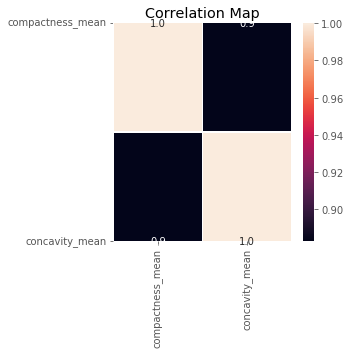

In [48]:
f,ax=plt.subplots(figsize = (4,4))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [28]:
print("Covariance diantara compactness mean dan concavity mean: ",data.compactness_mean.cov(data.concavity_mean))

Covariance diantara compactness mean dan concavity mean:  0.003718134921780181


In [29]:
p1 = data.loc[:,["concavity_mean","compactness_mean"]].corr(method= "pearson")
p2 = data.compactness_mean.cov(data.concavity_mean)/(data.compactness_mean.std()*data.concavity_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  concavity_mean  compactness_mean
concavity_mean          1.000000          0.883121
compactness_mean        0.883121          1.000000
Pearson correlation:  0.883120670177251


In [30]:
statistic, p_value = stats.ttest_rel(data.compactness_mean,data.concavity_mean)
print('p-value adalah: ',p_value)

p-value adalah:  4.29231315918515e-18
